### Задание 1
Retention – один из самых важных показателей в компании. 
Задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 
Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.

---

### Решение.
Retention rate — это коэффициент удержания пользователей. Он показывает, сколько клиентов возвращается в приложение игры за определённый период после установки.
Метрика retention rate рассчитывается как отношение вернувшихся в приложение пользователей к числу установивших его в определённую дату.

Начнем решение с загрузки необходимых библиотек и небольшой предобработки данных.

In [1]:
# Импортируем библиотеки
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# указываем путь к файлам
auth_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-pivovarov-25/shared/problem1-auth_data.csv'
reg_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-pivovarov-25/shared/problem1-reg_data.csv'

In [18]:
# загружаем данные в датафреймы
auth_df = pd.read_csv(auth_path, sep=';')
reg_df = pd.read_csv(reg_path, sep=';')

In [4]:
# Посмотрим как выглядят данные
auth_df.head(3)

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2


In [5]:
reg_df.head(3)

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3


In [6]:
# и общую информацию по данным
auth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB


In [7]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   reg_ts  1000000 non-null  int64
 1   uid     1000000 non-null  int64
dtypes: int64(2)
memory usage: 15.3 MB


Как видно, данные о датах хранятся в Unix timestamp, потому приведем их к формату DateTime
Объеденим два датафрейма и сделаем сводную таблицу, в которой по горизонтали - разница в днях, по вертикали - даты регистрации,а на пересечении - кол-во пользователей.

In [8]:
# Приводим даты к формату DateTime
reg_df['reg_ts'] = pd.to_datetime(reg_df['reg_ts'], unit='s').dt.date
auth_df['auth_ts'] = pd.to_datetime(auth_df['auth_ts'], unit='s').dt.date

In [9]:
# Объеденяем два датафрейма по колонке 'uid'
full_df = auth_df.merge(reg_df, on='uid')

In [10]:
# Расчитываем разницу в днях от запуска приложения, до момента регистрации
full_df['date_diff'] = (full_df.auth_ts - full_df.reg_ts).dt.days

In [11]:
# Делаем сводную таблицу
full_df_pivot = full_df.pivot_table(index='reg_ts',
                                    columns='date_diff', 
                                    values='uid', 
                                    aggfunc='nunique')

In [12]:
# Посмотрим на получившийся результат
full_df_pivot

date_diff,0,1,2,3,4,5,6,7,8,9,...,7701,7704,7706,7709,7712,7716,7720,7721,7727,7729
reg_ts,,,,,,,,,,,,,,,,,,,,,
1998-11-18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-07-22,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2000-01-13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-28,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-16,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19,1634.0,30.0,58.0,77.0,57.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-20,1636.0,40.0,71.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-21,1638.0,31.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для расчета RR нам нам нужно посчтитать отношение кол-во авторизированных пользователей к числу зарегестрировавшихся в него.
Если посмотреть на нашу сводную таблицу,  то  по ней видно, что данные о кол-ве зарегестрировавшихся пользоватей находятся в "0" столбце, потому нам нужно разделить каждый столбец таблицы на него. 

In [13]:
# запишем данные первого столбца в переменную day_zero
day_zero = full_df_pivot.iloc[:, 0] 

In [14]:
# Расчитаем нащ ретеншен рейт
retention_rate = full_df_pivot.divide(day_zero, axis=0)

In [15]:
# Выведем получившийся датафрейм и заполним пропуски
retention_rate.fillna(0)

date_diff,0,1,2,3,4,5,6,7,8,9,...,7701,7704,7706,7709,7712,7716,7720,7721,7727,7729
reg_ts,,,,,,,,,,,,,,,,,,,,,
1998-11-18,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-07-22,1.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2000-01-13,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-05-28,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-09-16,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19,1.0,0.018360,0.035496,0.047124,0.034884,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-20,1.0,0.024450,0.043399,0.023839,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-21,1.0,0.018926,0.029915,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Объеденим ранее написанный код в итоговую функцию.
На вход функция retention будет принимать 4 параметра:

* reg_path - путь к файлу с данныи регистраций
* auth_data - путь к файлу с данныи авторизаций
* start_date - от какой даты рассчитываем retention, в формате стороки 'YYYY-MM-DD'
* final_date - до какой даты рассчитываем retention, в формате стороки 'YYYY-MM-DD'


In [16]:
def retention(reg_path, auth_path, start_date, final_date):
    auth_df = pd.read_csv(auth_path, sep=';')
    reg_df = pd.read_csv(reg_path, sep=';')

    '''Зададим введенным датам необходимый формат'''
    start_date, final_date = pd.to_datetime(start_date), pd.to_datetime(final_date)

    reg_df['reg_ts'] = pd.to_datetime(reg_df['reg_ts'], unit='s').dt.date
    auth_df['auth_ts'] = pd.to_datetime(auth_df['auth_ts'], unit='s').dt.date
    full_df = auth_df.merge(reg_df, on='uid')

    '''Отберем данные за указанный период'''
    full_df = full_df.loc[(full_df.reg_ts >= start_date) & (full_df.auth_ts <= final_date)]

    full_df['date_diff'] = (full_df.auth_ts - full_df.reg_ts).dt.days
    full_df_pivot = full_df.pivot_table(index='reg_ts', columns='date_diff', values='uid', aggfunc='nunique')
    day_zero = full_df_pivot.iloc[:, 0] 
    retention_rate = full_df_pivot.divide(day_zero, axis=0)

    '''Визуализируем полученные данные'''   
    plt.figure(figsize=(20, 15))
    plt.title('Retention игроков по дням от даты регистрации, %', fontsize=30)
    sns.heatmap(retention_rate, vmin=0.0, vmax=0.12,
                cmap='RdYlGn', linewidths=1, linecolor='white',
                fmt='.2%', annot=True)
    plt.ylabel('Дата регистрации', fontsize=25) 
    plt.xlabel('Кол-во дней после регистрации', fontsize=25)
    plt.show()

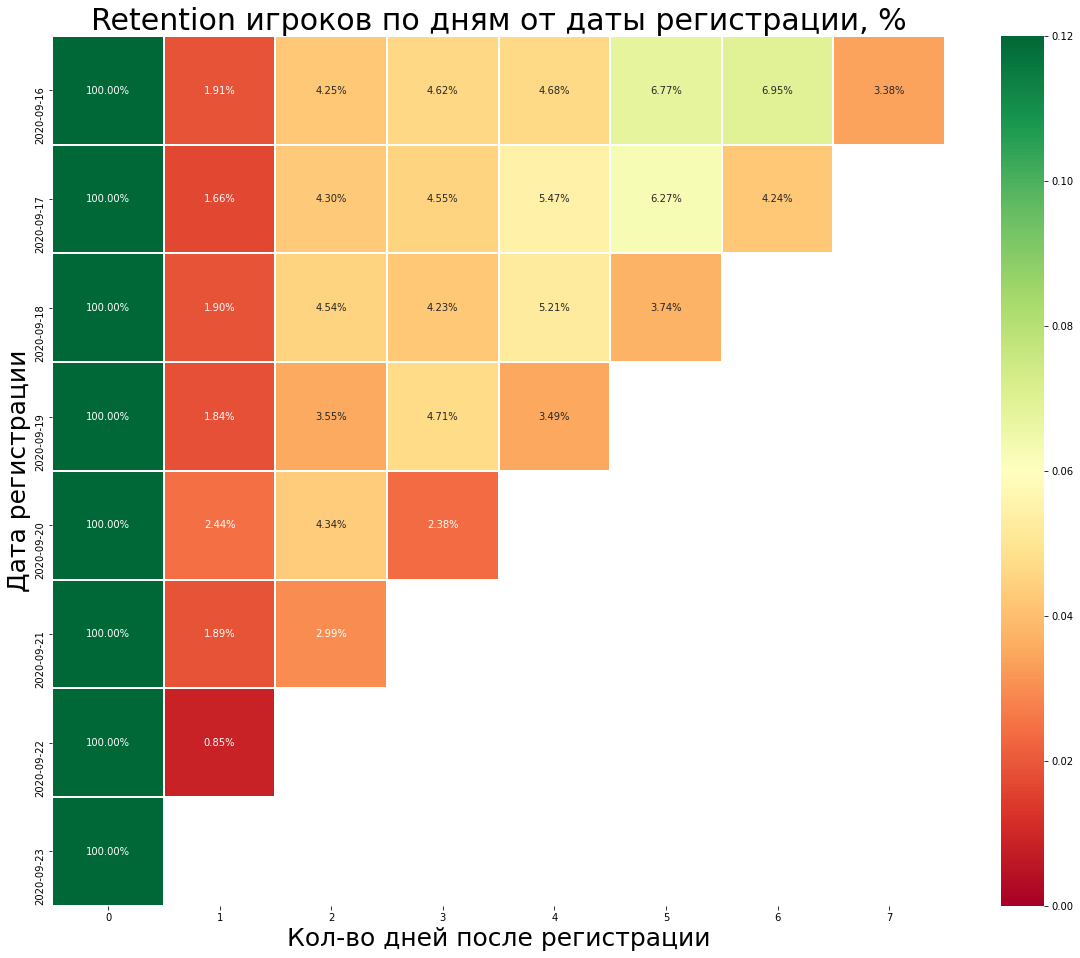

In [17]:
# для теста вызовем функцию и расчитаем ретеншен 7го дня
retention(reg_path, auth_path, '2020-09-16', '2020-09-23')

___

### Вывод:

Судя по данным, показатель ретеншена за заданный период низкий, стоит обратить на эту метрику внимание, так как в игрых важно удерживать пользователя. Компании нужно придумать способ, как повысить ее, ведь это влияет на популярность приложения, а соответсвенно, и на прибыль компании. Например, можно добавить внутриигровую награду за ежедневное посещение игры или ежедневного события.